### Ομάδα 70: 
#### Χρήστος Παπαδημητρίου, el18017
#### Βαρθολομαίος Βαμβακάρης, el18072
#### Ζαχαρίας-Παύλος Αναστασιάδης, el18161

# Dataset : Connectionist Bench (Sonar, Mimes vs. Rocks)

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade matplotlib # Κάνουμε update την matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Εισαγωγή & Επισκόπηση

In [2]:
import pandas as pd

df = pd.read_csv('sonar.all-data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
# check if we have any missing values

isNullArray, nullValsPresent = df.isnull(), False

for numCol in isNullArray:
    if True in isNullArray[numCol]:
        print("Missing Values in column: " + str(col))
        flag = True

if not nullValsPresent:
    print("There are missing data in the Dataset")

There are missing data in the Dataset


#### Σύντομη Παρουσίαση του Dataset
Το παραπάνω Dataset περιλαμβάνει 208 δείγματα που αντιστοιχούν σε patterns συχνοτήτων. Αυτά τα patterns έχουν προκύψει από την αντανάκλαση σημάτων Sonar σε μεταλλικούς κυλίνδρους και σε πετρώματα. Συγκεκριμένα τα σήματα Sonar που χρησιμοποιήθηκαν είναι "Chirps" αυξανόμενης συχνότητας. Το Dataset περιλαμβάνει αποτελέσματα εκπομπής Sonar από ποικίλες γωνίες (aspect angles), μεχρί 90$^{o}$ για τους μεταλλικούς κυλίνδρους και μέχρι 180$^{o}$ για τα πετρώματα. 

Κάθε pattern περιγράφεται από 60 αριθμούς μεταξύ 0.0 και 1.0. Καθένας από αυτούς τους αριθμούς αντιστοιχεί στο ολοκλήρωμα της ενέργειας μιας συγκεκριμένης μπάντας συχνοτήτων για μια περίοδο στον χρόνο. 

Τα labels που συναντάμε στο dataset είναι 'R' για τα πετρώματα (Rocks) και 'Μ' για τους μεταλλικούς κυλίνδρους (Metal cylinder). 

Σημειώνεται ότι **δεν** χρειάστηκε να γίνουν μετατροπές στο αρχείο 'sonar.all-data' πριν την εισαγωγή του στο Notebook

#### Ακολουθούν κάποιες επιπλέον πληροφορίες για το Dataset:
* Το Dataset περιλαμβάνει 208 δείγματα. Κάθε δείγμα έχει 60 χαρακτηριστηκά. Το καθένα από αυτά είναι μία τιμή μεταξύ 0.0 και 1.1 (Το ολοκήρωμα της ενέργειας που αναφέραμε παραπάνω) 
* Δεν υπάρχουν επικεφαλίδες, ούτε αρίθμηση γραμμών
* Οι ετικέτες των κλάσεων παίρνουν τιμές 'R' και 'Μ', όπως αναφέραμε παραπάνω. Βρίσκονται στην 61$^{η}$ κολόνα (index 60).
* Δεν υπάρχουν δείγματα με απουσιάζουσες τιμές
* Η κλαση R έχει 97 δείγματα (ποσοστό: 46.6%), ενώ η κλάση M έχει 111 δείγματα (ποσοστό: 53.4%). Σύμφωνα με το όριο 60%-40% πρόκειται για ισορροπημένο Dataset.

## Προετοιμασία

In [4]:
# split the dataframe into features matrix and labels column
features_df, labels_df = df.iloc[:,1:60], df.iloc[:,[60]]
labels_df

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [5]:
# turn features into a numpy array
features_np = features_df.values
features_np

array([[0.0371, 0.0428, 0.0207, ..., 0.0084, 0.009 , 0.0032],
       [0.0523, 0.0843, 0.0689, ..., 0.0049, 0.0052, 0.0044],
       [0.0582, 0.1099, 0.1083, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0437, 0.018 , 0.0292, ..., 0.0138, 0.0077, 0.0031],
       [0.0353, 0.049 , 0.0608, ..., 0.0079, 0.0036, 0.0048],
       [0.0363, 0.0136, 0.0272, ..., 0.0036, 0.0061, 0.0115]])

In [6]:
# replace (R,M) with (0,1) in labels 

labels_df = labels_df.replace({'R':0}).replace({'M':1})
labels_np = labels_df.values.flatten()
labels_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split

# split our data into training and testing data
train, test, train_labels, test_labels = train_test_split(features_np, labels_np, test_size=0.30)

## Ταξινόμηση

In [8]:
# import all classifiers 
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

### Επίδοση Out-Of-the-Box

In [14]:
# Dummy Classifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

accuracy_scores = dict()
f1_scores = dict()
dummy_classifiers = [(dc_uniform, 'dc uniform'), (dc_constant_0, 'dc constant 0'),\
                       (dc_constant_1, 'dc constant 1'), (dc_most_frequent, 'dc most frequent'),\
                       (dc_stratified, 'dc stratified')]

for (classifier, name) in dummy_classifiers:
    # train 
    model = classifier.fit(train, train_labels)
    # predict for test data
    preds = classifier.predict(test)
    # calculate accuracy
    accuracy_scores[name] = round(accuracy_score(test_labels, preds),3)
    # calculate f1 scores
    f1_scores[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)

In [15]:
# Gaussian Naive Bayes Classifier

name = 'gnb'
gnb = GaussianNB()
#train
model = gnb.fit(train, train_labels)
# predict for test data
preds = gnb.predict(test)
# calculate accuracy
accuracy_scores[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
f1_scores[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)

In [16]:
# K-Nearest-Neighbours

name = 'knn'
knn = KNeighborsClassifier()
# train
knn.fit(train, train_labels)
# predict for test data
preds = knn.predict(test)
# calculate accuracy
accuracy_scores[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
f1_scores[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)

**Παρουσίαση Επίδοσης Out-of-the-Box:**

In [17]:
# print results
for name in accuracy_scores.keys():
    print("Classifier: " + name + "->accuracy: " + str(accuracy_scores[name]) + \
         ", f1-score: " + str(f1_scores[name]))
    print()    

Classifier: dc uniform->accuracy: 0.556, f1-score: 0.555

Classifier: dc constant 0->accuracy: 0.524, f1-score: 0.344

Classifier: dc constant 1->accuracy: 0.476, f1-score: 0.323

Classifier: dc most frequent->accuracy: 0.476, f1-score: 0.323

Classifier: dc stratified->accuracy: 0.524, f1-score: 0.523

Classifier: gnb->accuracy: 0.667, f1-score: 0.654

Classifier: knn->accuracy: 0.746, f1-score: 0.745



| Classifier | Accuracy | F1-score |
| :-: | :-: | :-: |
| Dummy-Uniform | 0.42857142857142855 | 0.4284274193548387 |
| Dummy-Constant-0 | 0.47619047619047616 | 0.3225806451612903 |
| Dummy-Constant-1 | 0.5238095238095238 | 0.34375000000000006 |
| Dummy-Most-Frequent | 0.5238095238095238 | 0.34375000000000006 |
| Dummy-Stratified | 0.47619047619047616 | 0.471395881006865 |
| Gaussian Naive Bayes | 0.6984126984126984 | 0.6971920060713381 |
| K-Nearest-Neighbours | 0.8095238095238095 | 0.8055555555555555 

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# function to plot bar charts
def plotBarChart(x, ylist, cols, labs, tit, xlab, ylab):
    xaxis = np.arange(len(x))

    # offsets of bar plots
    totalWidth = len(ylist)*0.2-0.2
    offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]
    fig, ax = plt.subplots(figsize=(15,8))
    for i in range(len(ylist)):
        fig = plt.bar(xaxis+offset[i], ylist[i], color=cols[i], label=labs[i], width=0.2)
        # correct the label names
        labels = [item.get_text() for item in ax.get_xticklabels()]
        for i in range(1,len(labels)-1):
            labels[i] = x[i-1]
        ax.set_xticklabels(labels)
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(tit)

<ipython-input-41-be069ee9f6bd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


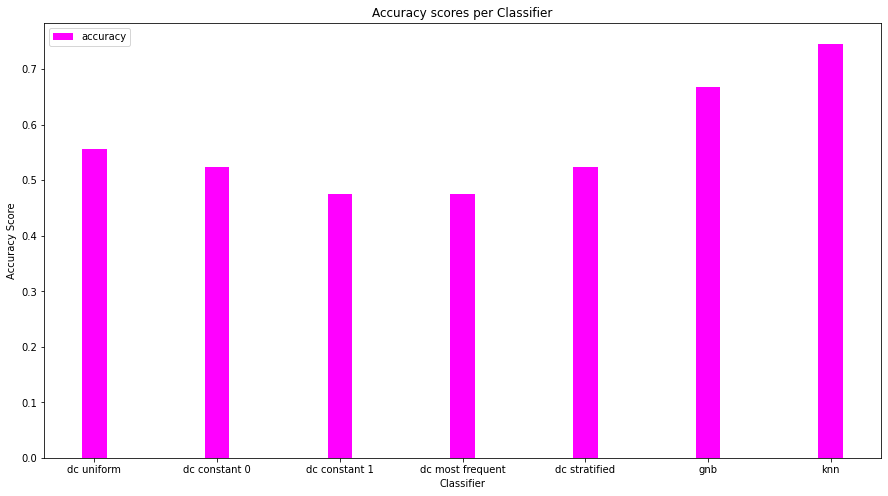

In [47]:
xaxis, yaxis = [], []
for (key, val) in accuracy_scores.items():
    xaxis.append(key)
    yaxis.append(val)

plotBarChart(xaxis, [yaxis], ['magenta'], ['accuracy'],\
             'Accuracy scores per Classifier', 'Classifier', 'Accuracy Score')

<ipython-input-41-be069ee9f6bd>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


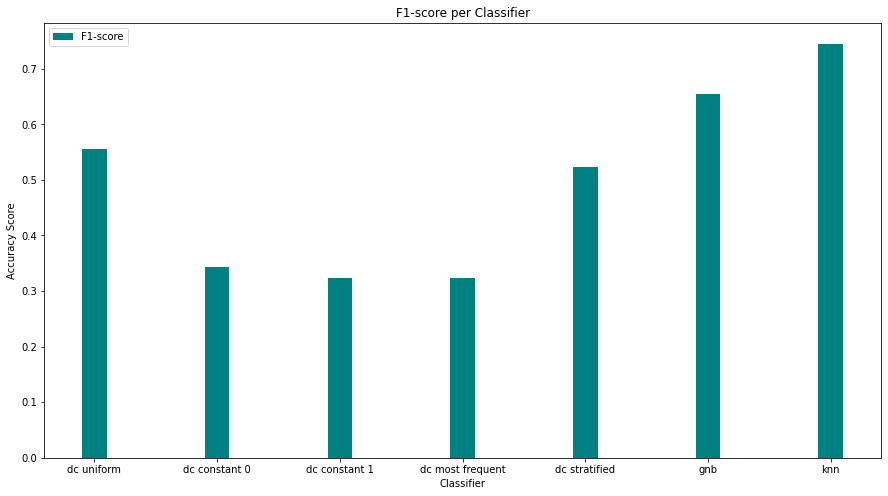

In [48]:
xaxis, yaxis = [], []
for (key, val) in f1_scores.items():
    xaxis.append(key)
    yaxis.append(val)

plotBarChart(xaxis, [yaxis], ['teal'], ['F1-score'],\
             'F1-score per Classifier', 'Classifier', 'Accuracy Score')

### Βελτιστοποίηση

## Αποτελέσματα & Συμπεράσματα